In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import RobustScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("car_price_prediction.csv")
df.head(7)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
5,45802912,39493,891,HYUNDAI,Santa FE,2016,Jeep,Yes,Diesel,2,160931 km,4.0,Automatic,Front,04-May,Left wheel,White,4
6,45656768,1803,761,TOYOTA,Prius,2010,Hatchback,Yes,Hybrid,1.8,258909 km,4.0,Automatic,Front,04-May,Left wheel,White,12


# Data Exploration and Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
for x in df.columns:
  print(x)
  print(df[x].unique())
  print("*"*90)

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
******************************************************************************************
Price
[13328 16621  8467 ... 56814 63886 22075]
******************************************************************************************
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '

In [6]:
# By looking at the unique values of "Levy" feature we find it has a missing values '-'
# Replace "-" with NaN
df["Levy"].replace("-",np.NaN,inplace=True)
# Change the dtype of "Levy" feature from object to float64
df["Levy"] = df["Levy"].astype("float64")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [7]:
# Replace 'Yes' 'No' with True False in Leather interior feature
df['Leather interior'].replace({'Yes': True, 'No':False}, inplace=True)
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [8]:
# Making sure that we don miss anything so making everything lower first
df['Engine volume'] = df['Engine volume'].str.lower()
# Finding the rows which has turbo in them and assigning the results to new column Turbo. 
df['Turbo Engine'] = df['Engine volume'].str.contains('turbo')
# Slicing engine volumes and converting type to float
df['Engine volume'] = df['Engine volume'].str.slice(0,3)
df['Engine volume'] = df['Engine volume'].astype('float64')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo Engine
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False


In [9]:
# Removing " km" in "Mileage" Feature
df["Mileage"]=df["Mileage"].str.strip(" km")
# Change the dtype of "Mileage" feature from object to int64
df["Mileage"] = df["Mileage"].astype("int64")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo Engine
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False


In [10]:
# Replacing ['04-May','02-Mar','>5'] to [4,2,6] in "Doors" feature
df["Doors"].replace(['04-May','02-Mar','>5'],[4,2,5],inplace=True)
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo Engine
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False


## **2.1 Data Quality Report**

In [11]:
# Writing the descriptions of features in the dataset
df.drop(['ID'], axis = 1, inplace = True)
features_df=pd.DataFrame(index=df.columns)
desc = ["Price of the Car","Levy","Manufacturer Details","Model of the Car","Production year of the Car","Category of the Car","Is it Leather interior","Type of Fuel","Volume of the engine","Mileage of the car","No of Cylinders","Which type of Gear Box is used?","Drive wheels","No of Doors","Wheel Type","Car Color","No of Airbags","Is the engine type Turbo"]
features_df["Desc"]= desc

In [12]:
continuous_features = ['Price', 'Levy', 'Prod. year', 'Engine volume','Doors', 'Mileage', 'Cylinders', 'Airbags']
contegorical_features = ['Manufacturer','Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Turbo Engine', 'Color']

In [13]:
# Creating a Data Frame for Continuous features
Quality_Continuous = pd.DataFrame({"Feature":{},"Desc":{},"Count":{},"% of Missing":{},"Card.":{},"Min.":{},"Q1":{},"Median":{},"Q3":{},"Max.":{},"Mean":{},"Std.Dev.":{},"Notes":{}})
Quality_Continuous["Feature"] = continuous_features
Quality_Continuous["Desc"] = features_df.loc[continuous_features].values
Quality_Continuous["Count"] = df.shape[0]
Quality_Continuous["% of Missing"] = 100*(df[continuous_features].isna().sum().values)/df.shape[0]
n = len(continuous_features)
for i in range(n):
    Quality_Continuous.loc[i,"Card."] = (df[continuous_features[i]].unique()).size
    Quality_Continuous["Min."] = (df[continuous_features].min()).values
    Quality_Continuous["Q1"] = (df[continuous_features].quantile(0.25)).values
    Quality_Continuous["Median"] = (df[continuous_features].median()).values
    Quality_Continuous["Q3"] = (df[continuous_features].quantile(0.75)).values
    Quality_Continuous["Max."] = (df[continuous_features].max()).values
    Quality_Continuous["Mean"] = (df[continuous_features].mean()).values
    Quality_Continuous["Std.Dev."] = (df[continuous_features].std()).values
    Quality_Continuous["Notes"] = " "
Quality_Continuous

,Feature,Desc,Count,% of Missing,Card.,Min.,Q1,Median,Q3,Max.,Mean,Std.Dev.,Notes
0,Price,Price of the Car,19237,0.000000,2315.0,1.0,5331.0,13172.0,22075.0,2.630750e+07,1.855593e+04,1.905813e+05,
1,Levy,Levy,19237,30.248999,559.0,87.0,640.0,781.0,1058.0,1.171400e+04,9.068381e+02,4.618671e+02,
2,Prod. year,Production year of the Car,19237,0.000000,54.0,1939.0,2009.0,2012.0,2015.0,2.020000e+03,2.010913e+03,5.668673e+00,
3,Engine volume,Volume of the engine,19237,0.000000,65.0,0.0,1.8,2.0,2.5,2.000000e+01,2.307990e+00,8.778045e-01,
4,Doors,No of Doors,19237,0.000000,3.0,2.0,4.0,4.0,4.0,5.000000e+00,3.925872e+00,4.033993e-01,
5,Mileage,Mileage of the car,19237,0.000000,7687.0,0.0,70139.0,126000.0,188888.0,2.147484e+09,1.532236e+06,4.840387e+07,
6,Cylinders,No of Cylinders,19237,0.000000,13.0,1.0,4.0,4.0,4.0,1.600000e+01,4.582991e+00,1.199933e+00,
7,Airbags,No of Airbags,19237,0.000000,17.0,0.0,4.0,6.0,12.0,1.600000e+01,6.582627e+00,4.320168e+00,


In [14]:
Quality_Categorical = pd.DataFrame({"Feature":{},"Desc":{},"Count":{},"% of Missing":{},"Card.":{},"Mode":{},"Mode Freq.":{},"Mode %":{},"2nd Mode":{},"2nd Mode Freq.":{},"2nd Mode %":{},"Notes":{}})
Quality_Categorical["Feature"] = contegorical_features
Quality_Categorical["Desc"] = features_df.loc[contegorical_features].values
Quality_Categorical["Count"] = df.shape[0]
Quality_Categorical["% of Missing"] = 100*(df[contegorical_features].isna().sum().values)/df.shape[0]
m = len(contegorical_features)
for i in range(m):
    counts = df[contegorical_features[i]].value_counts()
    Quality_Categorical.loc[i,"Card."] = counts.size
    if((counts.index)[0]=="NaN"):
        Quality_Categorical.loc[i,"Mode"] = (counts.index)[1]
        Quality_Categorical.loc[i,"Mode Freq."] = counts[1]
        Quality_Categorical.loc[i,"Mode %"] = 100*counts[1]/df.shape[0]
        Quality_Categorical.loc[i,"2nd Mode"] = (counts.index)[2]
        Quality_Categorical.loc[i,"2nd Mode Freq."] = counts[2]
        Quality_Categorical.loc[i,"2nd Mode %"] = 100*counts[2]/df.shape[0]
    else:
        Quality_Categorical.loc[i,"Mode"] = (counts.index)[0]
        Quality_Categorical.loc[i,"Mode Freq."] = counts[0]
        Quality_Categorical.loc[i,"Mode %"] = 100*counts[0]/df.shape[0]
        Quality_Categorical.loc[i,"2nd Mode"] = (counts.index)[1]
        Quality_Categorical.loc[i,"2nd Mode Freq."] = counts[1]
        Quality_Categorical.loc[i,"2nd Mode %"] = 100*counts[1]/df.shape[0]
Quality_Categorical["Notes"]=" "
Quality_Categorical

,Feature,Desc,Count,% of Missing,Card.,Mode,Mode Freq.,Mode %,2nd Mode,2nd Mode Freq.,2nd Mode %,Notes
0,Manufacturer,Manufacturer Details,19237,0.0,65.0,HYUNDAI,3769.0,19.592452,TOYOTA,3662.0,19.036232,
1,Category,Category of the Car,19237,0.0,11.0,Sedan,8736.0,45.412486,Jeep,5473.0,28.450382,
2,Leather interior,Is it Leather interior,19237,0.0,2.0,True,5283.0,27.462702,False,13954.0,72.537298,
3,Fuel type,Type of Fuel,19237,0.0,7.0,Petrol,10150.0,52.762905,Diesel,4036.0,20.980402,
4,Gear box type,Which type of Gear Box is used?,19237,0.0,4.0,Automatic,13514.0,70.250039,Tiptronic,3102.0,16.125175,
5,Drive wheels,Drive wheels,19237,0.0,3.0,Front,12874.0,66.923117,4x4,4058.0,21.094765,
6,Wheel,Wheel Type,19237,0.0,2.0,Left wheel,17753.0,92.285699,Right-hand drive,1484.0,7.714301,
7,Turbo Engine,Is the engine type Turbo,19237,0.0,2.0,False,17306.0,89.962052,True,1931.0,10.037948,
8,Color,Car Color,19237,0.0,16.0,Black,5033.0,26.163123,White,4489.0,23.335239,


**Barplots**

In [1]:
# plt.fig
#for i in range(m):
#    plt.figure(figsize=(10,6))
#    print("Bar Plot of",contegorical_features[i],"\n")
#    df_for_bar = df[contegorical_features[i]].value_counts()
#    if(contegorical_features[i]=="Manufacturer" or contegorical_features[i]=="Model"):
#      df_for_bar = df_for_bar[0:20] # ploting only top 20 for "Manufacturer" and "Model"
#    fig = df_for_bar.plot.bar()
#    plt.title(f"Bar Plot of {contegorical_features[i]}")
#    plt.show(fig)
#    print("\n","*"*140,"\n")

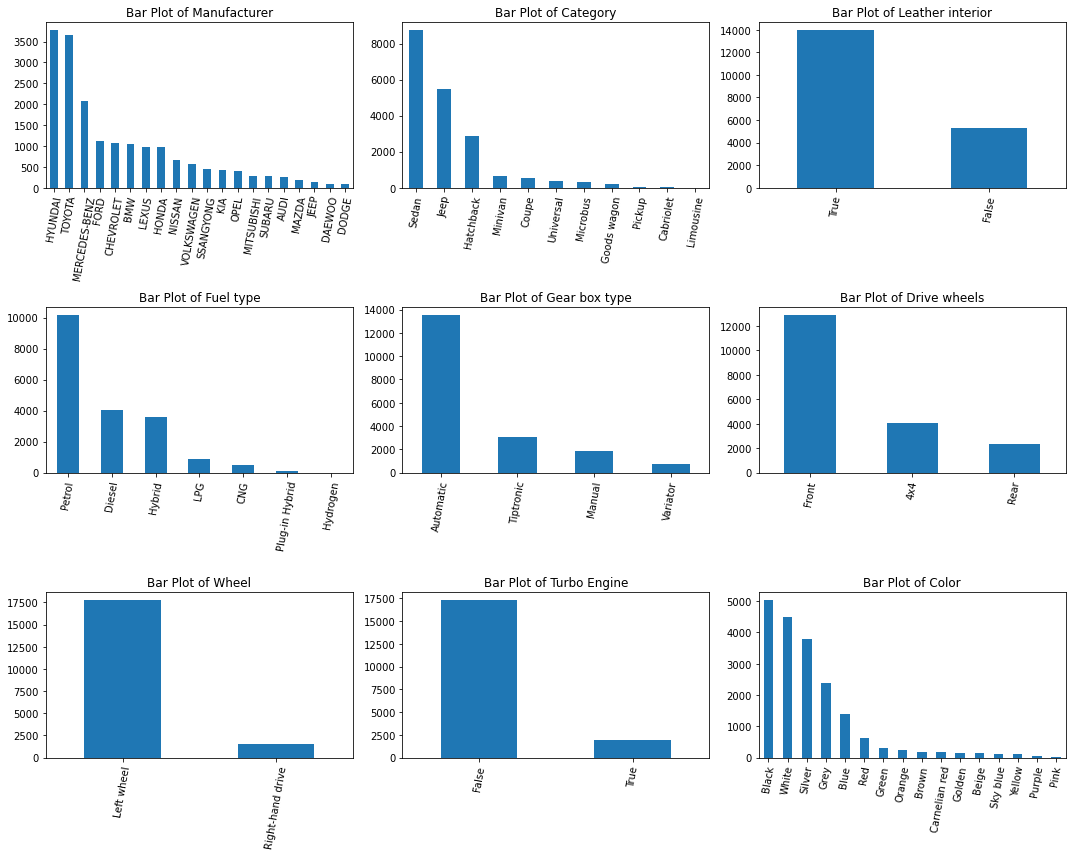

In [21]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,12))
for i in range(m):
    row = i // 3  # calculate the row index
    col = i % 3   # calculate the column index
    #print("Bar Plot of", contegorical_features[i])
    df_for_bar = df[contegorical_features[i]].value_counts()
    if (contegorical_features[i] == "Manufacturer" or contegorical_features[i] == "Model"):
        df_for_bar = df_for_bar[0:20]  # ploting only top 20 for "Manufacturer" and "Model"
    df_for_bar.plot.bar(ax=axs[row, col])
    axs[row, col].set_title(f"Bar Plot of {contegorical_features[i]}")
    axs[row, col].tick_params(axis='x', labelrotation=80) 
plt.tight_layout()
plt.show()


**Histograms**

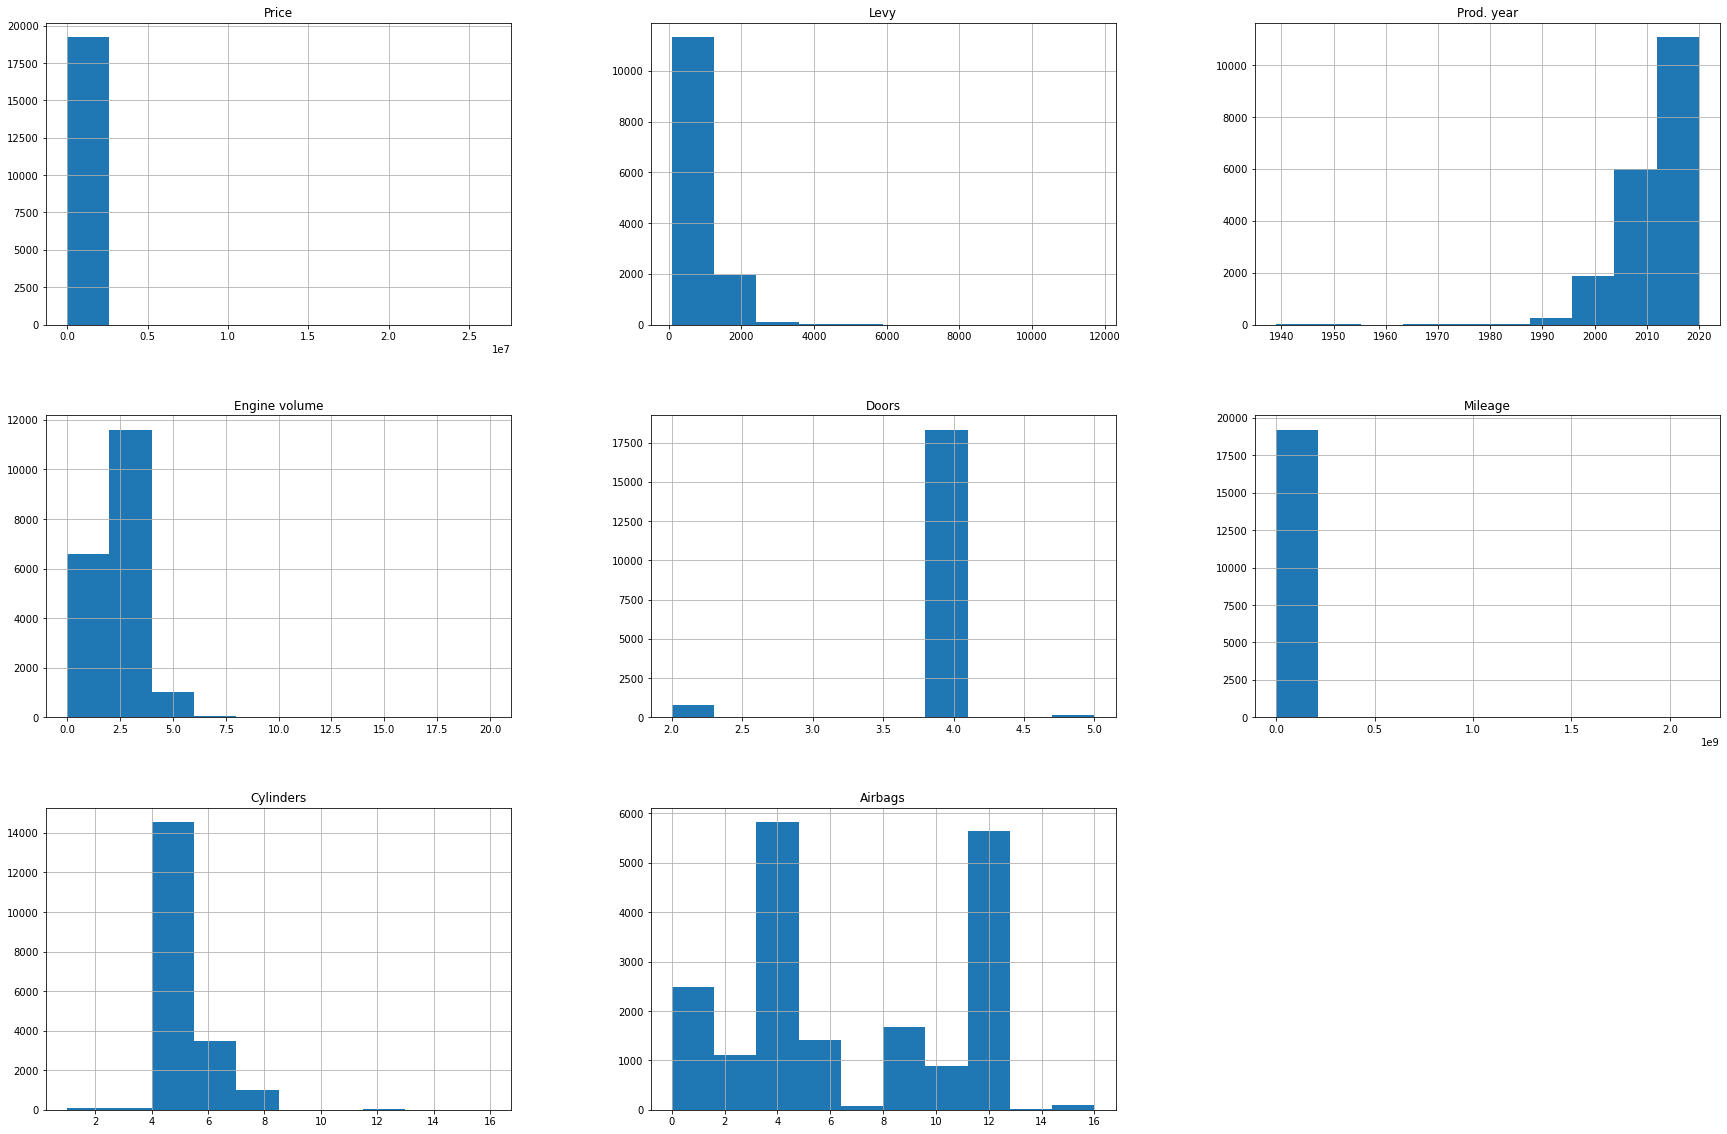

In [27]:
df[continuous_features].hist(figsize=(30,20))
plt.show()

## **2.2 EDA**

Text(0, 0.5, 'Number of instances')

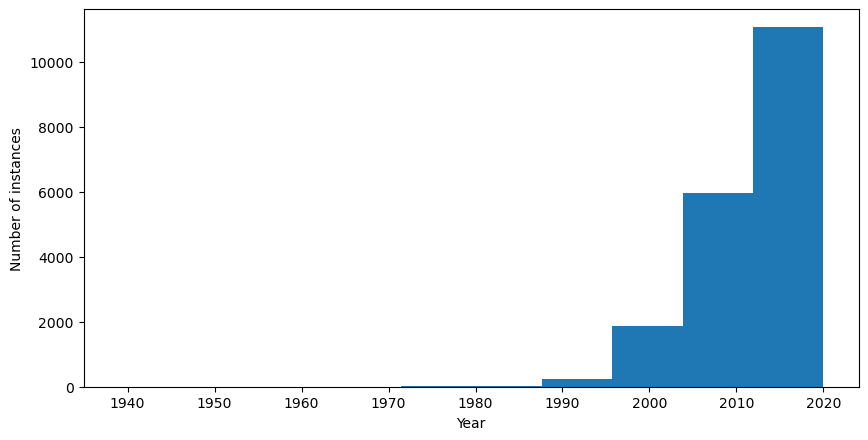

In [28]:
plt.figure(figsize=(10,5), dpi=100)
plt.hist(df['Prod. year'])
plt.xlabel('Year')
plt.ylabel('Number of instances')

<AxesSubplot:xlabel='Doors', ylabel='count'>

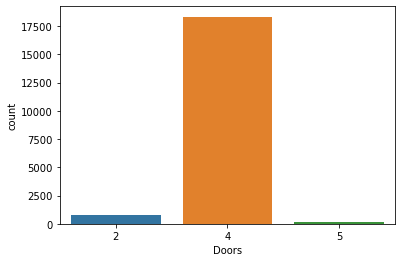

In [29]:
sns.countplot(data=df, x='Doors')

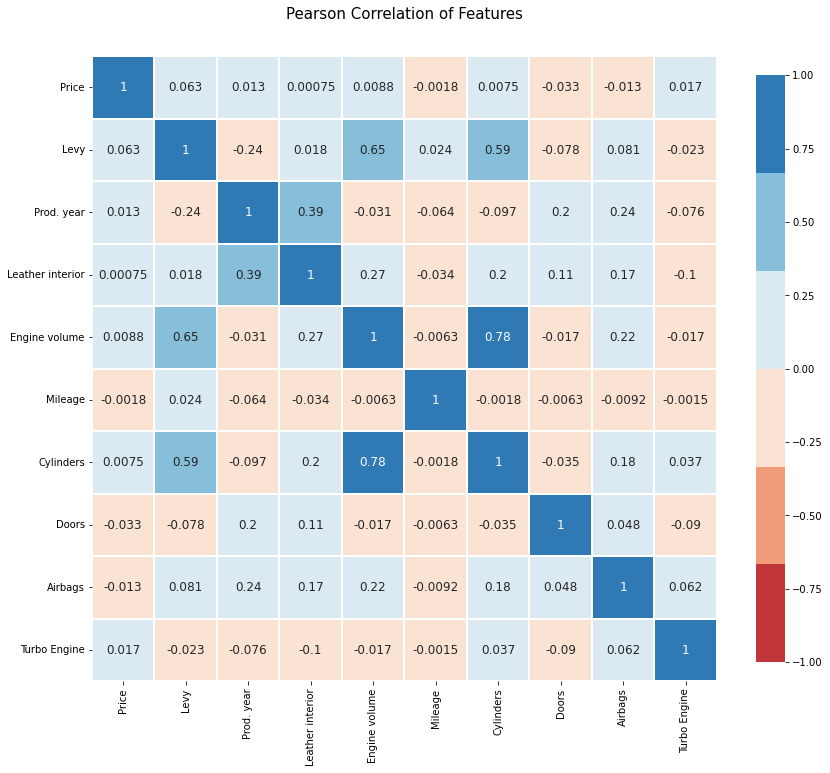

In [35]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    #colormap = sns.diverging_palette(220, 10, as_cmap = True)
    colormap = sns.color_palette("RdBu")
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        vmin=-1,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

## **2.3 Missing Values and Outliers**

### **Missing Values**

In [36]:
df.isnull().sum()

Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Turbo Engine           0
dtype: int64

In [37]:
c_df=df.copy()
c_df.dropna(axis=0,inplace=True)
arr=c_df["Manufacturer"].unique()
group=c_df.groupby(by="Manufacturer")
mean_levy = group.mean()["Levy"]
length = len(df["Levy"])
for i in range(length):
  x=df.loc[i,"Manufacturer"]
  if df.loc[i,"Levy"]!=df.loc[i,"Levy"] and x in arr:
    df.loc[i,"Levy"]=mean_levy[x]
df['Levy']=df['Levy'].fillna(0)

In [38]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
Turbo Engine        0
dtype: int64

### **Outliers**

In [2]:
#col_out = ["Levy","Engine volume", "Mileage", "Price"]
#for i in range(4):
#    plt.figure(figsize=(10,6))
#    print("Box Plot of",col_out[i],"\n")
#    fig = df.boxplot(col_out[i])
#    plt.title(f"Box Plot of {col_out[i]}")
#    plt.show(fig)
#    print("\n","*"*140,"\n")

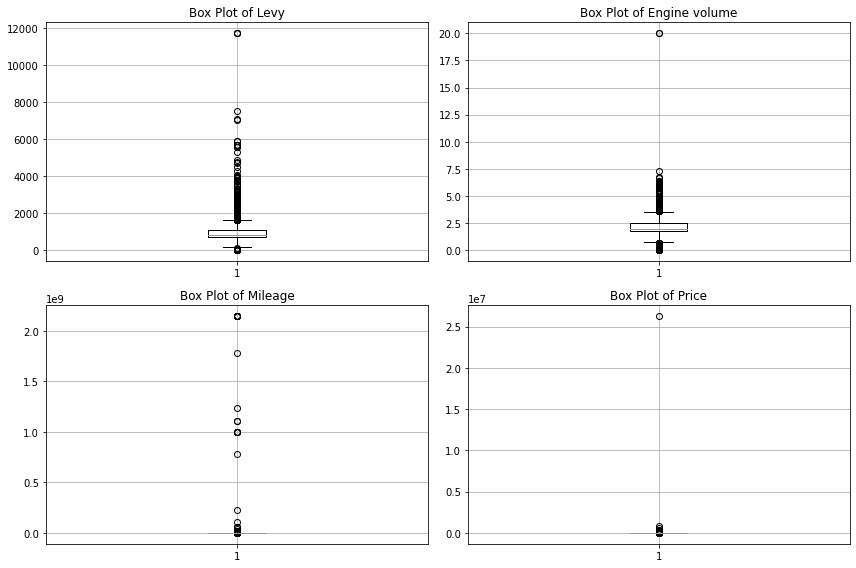

In [41]:
col_out = ["Levy","Engine volume", "Mileage", "Price"]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(col_out):
    row = i // 2
    col = i % 2
    axs[row, col].boxplot(df[col_out[i]])
    axs[row, col].set_title(f"Box Plot of {col_out[i]}")
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()


In [42]:
def outlier_IQR(con_df):
  print(f"{con_df}")
  Q1,Q3 = np.percentile(df[con_df] , [25,75])
  ul = Q3*1.5
  ll = Q1*1.5
  outliers = df[(df[con_df] > ul) | (df[con_df] < ll)]
  print(f"Lower limit: {ll}, Upper Limit: {ul}")
  print(f"Number of outliers: {len(outliers)}")
  print(f"outliers: {np.array(outliers[con_df])}")
  print('--'*50)

In [43]:
for col in col_out:
  outlier_IQR(col)

Levy
Lower limit: 1060.5, Upper Limit: 1623.4487447698746
Number of outliers: 14686
outliers: [1018.         803.8573975  862.        ...  831.         836.
  753.       ]
----------------------------------------------------------------------------------------------------
Engine volume
Lower limit: 2.7, Upper Limit: 3.75
Number of outliers: 15999
outliers: [1.3 2.5 1.3 ... 2.  2.  2.4]
----------------------------------------------------------------------------------------------------
Mileage
Lower limit: 105208.5, Upper Limit: 283332.0
Number of outliers: 9132
outliers: [ 91901 398069      0 ... 307325 300000  51258]
----------------------------------------------------------------------------------------------------
Price
Lower limit: 7996.5, Upper Limit: 33112.5
Number of outliers: 8874
outliers: [ 3607 39493  1803 ...  5802  5331   470]
----------------------------------------------------------------------------------------------------


In [57]:
def outlier_IQR(con_df):
    print(f"{con_df}")
    Q1, Q3 = np.percentile(df[con_df], [25, 75])
    IQR = Q3 - Q1
    ul = Q3 + 1.5*IQR
    ll = Q1 - 1.5*IQR
    outliers = df[(df[con_df] > ul) | (df[con_df] < ll)][con_df].tolist()
    
    extreme_outliers = []
    other_outliers = []
    for outlier in outliers:
        if outlier < ll or outlier > ul:
            extreme_outliers.append(outlier)
        else:
            other_outliers.append(outlier)
    
    if len(extreme_outliers) > 0:
        print(f"Extreme Outliers: {extreme_outliers[0]}, ... ,{extreme_outliers[-1]}")
    if len(other_outliers) > 0:
        print(f"Outliers: {other_outliers[0]}, ... ,{other_outliers[-1]}")
    print(f"Lower limit: {ll}, Upper Limit: {ul}")
    print(f"Number of outliers: {len(outliers)}")
    print('--'*50)


for col in col_out:
    outlier_IQR(col)

Levy
Extreme Outliers: 1620.0, ... ,1624.0
Lower limit: 138.5769230769232, Upper Limit: 1609.0384615384614
Number of outliers: 53
----------------------------------------------------------------------------------------------------
Engine volume
Extreme Outliers: 4.0, ... ,5.6
Lower limit: 0.2500000000000002, Upper Limit: 3.8499999999999996
Number of outliers: 509
----------------------------------------------------------------------------------------------------
Mileage
Extreme Outliers: 350000, ... ,350000
Lower limit: -90381.375, Upper Limit: 342635.625
Number of outliers: 125
----------------------------------------------------------------------------------------------------
Price
Extreme Outliers: 45734, ... ,44611
Lower limit: -18032.5, Upper Limit: 43435.5
Number of outliers: 331
----------------------------------------------------------------------------------------------------


Remove Outlier

In [58]:
def remove_outlier(df_arr, ll, ul):
  del_id = []
  del_id = df[(df[df_arr] < ll) | (df[df_arr] > ul)].index
  print(f'{df_arr}: No of deleted values: {len(del_id)}')
  print(del_id)
  print("-"*50)
  return del_id

In [59]:
del_indices = []
for col in ["Levy", "Price", "Mileage"] :
  Q1,Q3 = np.percentile(df[col] , [25,75])
  IQR = Q3 - Q1
  # Outlier step
  outlier_step = IQR * 1.5
  ul = Q3 + outlier_step
  ll = Q1 - outlier_step
  del_indices.extend(remove_outlier(col, ll, ul))
df.drop(df.loc[del_indices].index, axis=0, inplace=True)

Levy: No of deleted values: 53
Int64Index([  719,   759,   976,  1127,  1965,  1980,  1992,  2000,  2247,
             2518,  2793,  3084,  3738,  3853,  3958,  4573,  5093,  5487,
             5489,  7047,  7117,  7344,  7504,  7818,  8208,  9781,  9920,
             9944, 10054, 10923, 11120, 11440, 11488, 11861, 12679, 13055,
            13694, 13734, 14290, 14322, 14384, 14477, 15215, 17660, 17754,
            17935, 18005, 18549, 18803, 18934, 19058, 19119, 19217],
           dtype='int64')
--------------------------------------------------
Price: No of deleted values: 331
Int64Index([   41,    72,   112,   172,   176,   201,   297,   313,   314,
              561,
            ...
            18728, 18759, 18812, 18850, 18912, 18926, 18975, 18980, 19056,
            19089],
           dtype='int64', length=331)
--------------------------------------------------
Mileage: No of deleted values: 125
Int64Index([   12,    91,   126,   204,   365,   576,   589,   602,  1061,
           

In [60]:
df.shape

(16222, 18)

## **2.4 Feature Selection**

Chi - square test on categorical columns

In [61]:
from scipy.stats import chi2_contingency

In [62]:
cat_attribs = ['Manufacturer','Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo Engine']
for j in cat_attribs:
  print(j)
  chi2_check = []
  for i in cat_attribs:
      if chi2_contingency(pd.crosstab(df[j], df[i]))[1] < 0.05:
          chi2_check.append('Reject Null Hypothesis')
      else:
          chi2_check.append('Fail to Reject Null Hypothesis')
  res = pd.DataFrame(data = [cat_attribs, chi2_check] 
              ).T 
  res.columns = ['Column', 'Hypothesis']
  print(res)
  print('*'*50)

Manufacturer
             Column              Hypothesis
0      Manufacturer  Reject Null Hypothesis
1          Category  Reject Null Hypothesis
2  Leather interior  Reject Null Hypothesis
3         Fuel type  Reject Null Hypothesis
4     Gear box type  Reject Null Hypothesis
5      Drive wheels  Reject Null Hypothesis
6             Wheel  Reject Null Hypothesis
7             Color  Reject Null Hypothesis
8      Turbo Engine  Reject Null Hypothesis
**************************************************
Category
             Column              Hypothesis
0      Manufacturer  Reject Null Hypothesis
1          Category  Reject Null Hypothesis
2  Leather interior  Reject Null Hypothesis
3         Fuel type  Reject Null Hypothesis
4     Gear box type  Reject Null Hypothesis
5      Drive wheels  Reject Null Hypothesis
6             Wheel  Reject Null Hypothesis
7             Color  Reject Null Hypothesis
8      Turbo Engine  Reject Null Hypothesis
***********************************************

Corelation test

In [63]:
from sklearn.preprocessing import LabelEncoder
cat_attribs = ['Manufacturer','Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo Engine']
encoder=LabelEncoder()
for x in cat_attribs:
  df_color=pd.DataFrame()
  df_color[x] = df[x]
  encoder.fit(df_color[x])
  df_color['enc_cat']=encoder.transform(df_color[x])
  corr=df['Price'].corr(df_color['enc_cat'])
  print(x)
  print("correlation ",corr)

Manufacturer
correlation  -0.06556334151754092
Category
correlation  -0.04244473314364189
Leather interior
correlation  0.07054639415665302
Fuel type
correlation  -0.08765469781654472
Gear box type
correlation  0.13649759702470005
Drive wheels
correlation  0.032928155506148096
Wheel
correlation  -0.15112614900318408
Color
correlation  0.030308987505018082
Turbo Engine
correlation  0.16392828057888967


Information Gain

Selecting top 12 features.

In [64]:
def entropy(feature, dataset):
  prob = dataset[feature].value_counts(normalize=True)
  entropy = -1 * np.sum(np.log2(prob) * prob)
  return entropy

def gini(feature, dataset):
  prob = dataset[feature].value_counts(normalize=True)
  gini = 1 - np.sum(np.square(prob))
  return gini

def IG(feature, target, dataset, measure):
  elements = dataset[feature].unique()
  rem = 0
  target_entropy = 0
  if measure == 'gini':
    target_entropy = gini(target, dataset)
  else:
    target_entropy = entropy(target, dataset)
  for x in elements:
    dataset_x = dataset[feature] == x
    if measure == 'gini':
      rem += (dataset_x.sum()/dataset.shape[0])*gini(target, dataset[dataset_x])
    else:
      rem += (dataset_x.sum()/dataset.shape[0])*entropy(target, dataset[dataset_x])
  return target_entropy - rem

def IUFS(target, dataset, k, measure='entropy'):
    column_lst = [x for x in dataset.columns if x != target]
    IG_dict = {}
    for x in column_lst:
      IG_dict[x] = IG(x, target, dataset, measure)
    IG_dict = sorted(IG_dict, key=IG_dict.get, reverse=True)
    return IG_dict[0:k]

feature_lst = IUFS('Price', df, 12, measure='entropy')
feature_lst

['Mileage',
 'Model',
 'Levy',
 'Prod. year',
 'Manufacturer',
 'Engine volume',
 'Airbags',
 'Color',
 'Category',
 'Fuel type',
 'Gear box type',
 'Leather interior']